# Chapter 4 NumPy Basics: Arrays and Vectorized Computation

**Features in NumPy:**<br>
* **ndarray: An efficient multidimensional array providing fast array-oriented arithmetic operations and flexible boradcasting capabilities**
* **Mathematical function for fast operation on entire arrays of data wihout having to write loops**
* **Tools for reading/writing array data to disk working memory-mapped files**
* **Linear algebra, random number generation, and Fourier transform capabilities**
* **A C API fro conecting NumPy with libraties written C,C++, or FORTRAN**

**NumPy is designed for efficiency on large arrays of data**<br>
* **NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects**
* **NumPy does not need type checking or other overhead**
* **NumPy operations perform complex computations on entire array wihout the need for Python for loops**

In [1]:
import numpy as np

In [2]:
my_arr=np.arange(1000000)

In [3]:
my_list=list(range(1000000))

In [4]:
%time for _ in range(10):my_arr2=my_arr*2

CPU times: user 13.9 ms, sys: 6 ms, total: 19.9 ms
Wall time: 18.9 ms


In [5]:
%time for _ in range(10): my_list2=[x*2 for x in my_list]

CPU times: user 635 ms, sys: 166 ms, total: 801 ms
Wall time: 803 ms


## 4.1 The NumPy ndarray: A Multidimensional Array Object

**ndarray: A fast, flexible container for large datasets in Python**

In [6]:
import numpy as np

In [7]:
data=np.random.randn(2,3)

In [9]:
data

array([[ 0.17118316,  1.10459098, -0.18862186],
       [ 0.77343494,  0.3792762 , -0.90378826]])

In [8]:
data*10

array([[ 1.71183155, 11.04590978, -1.88621861],
       [ 7.73434939,  3.79276204, -9.03788258]])

* **An ndarray is a generic multidimensional container for homogeneous data**
* **Every arrau has a** shape **, a tuple indicsting the** size **of each dimension, and a** dtype **, an object describing the** datatype **of this array**

In [10]:
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

### Creating ndarrays

**Use the** array **function, accepts any sequence-like object(including other arrays) and produces a new NumPy array containing the passed data**

In [12]:
data1=[6,7.5,8,0,1]

In [13]:
arr1=np.array(data1)

In [14]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

**Nested sequences will be converted into a multidimensional array**

In [15]:
data2=[[1,2,3,4],[5,6,7,8]]

In [16]:
arr2=np.array(data2)

In [17]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [18]:
arr2.shape

(2, 4)

In [19]:
arr2.ndim

2

np.array **tries to infer a good data type for the array it creates, data type is stored in a special** dtype **metadata object**

In [20]:
arr1.dtype

dtype('float64')

In [21]:
arr2.dtype

dtype('int64')

**Factory methods in creating new arrays**

In [24]:
np.zeros(10)#argument specifies lenghth and shape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [26]:
np.empty((2,3,2))

array([[[ 1.28822975e-231, -4.33452428e-311],
        [ 6.93523876e-310,  6.93524923e-310],
        [ 6.93524923e-310,  6.93524682e-310]],

       [[ 6.93524923e-310,  6.93525004e-310],
        [ 6.93523877e-310,  6.93525004e-310],
        [ 6.93525004e-310,  8.34402697e-309]]])

arange **is an array-valued version of the built-in Python** range **function**

In [28]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

data type **or** dtype **is a special object containing the information the ndarray needs to interpret a chunk of memory as a particular type of data**

In [30]:
arr1=np.array([1,2,3],dtype=np.float64)

In [31]:
arr2=np.array([1,2,3],dtype=np.int32)

In [32]:
arr1

array([1., 2., 3.])

In [33]:
arr2

array([1, 2, 3], dtype=int32)

* **Explicitly castting an array from one dtype to another using** astype **method**
* **Calling** astype **always creates a new array(a copy of the data), even if the new** dtype **is the same as the old** dtype

In [34]:
arr=np.array([1,2,3,4,5])

In [35]:
arr.dtype

dtype('int64')

In [36]:
float_arr=arr.astype(np.float64)

In [38]:
float_arr.dtype

dtype('float64')

In [41]:
numeric_string=np.array(['1.25','-9.6','42'],dtype=np.string_)

In [42]:
numeric_string.astype(np.float64)#if casting we to fail, a ValueError will be raised

array([ 1.25, -9.6 , 42.  ])

**Use another array's dtype attribute**

In [43]:
int_array=np.arange(10)

In [44]:
calibers=np.array([2.,42.,3.,5.],dtype=np.float64)

In [45]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### Arithmeyiv with NumPy Arrays

***vectorization*: Any arithmetic operation between equal-size arrays applies the operation element wise**

In [50]:
arr=np.array([[1.,2.,3.],[4.,5.,6.]])

In [51]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [52]:
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [53]:
arr-arr

array([[0., 0., 0.],
       [0., 0., 0.]])

**Arithmetic operations with scalars propagate the scalar argument to each element in the array**

In [54]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [55]:
arr**0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

**Comparison between arrays of the same size yield boolean arrays**

In [56]:
arr2=np.array([[0.,4.,1.],[7.,2.,12.]])

In [57]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [58]:
arr2>arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

**One-dimensional arrays act similarly to Python lists**

In [59]:
arr=np.arange(10)

In [60]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
arr[5]

5

In [62]:
arr[5:8]

array([5, 6, 7])

In [63]:
arr[5:8]=12

In [64]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

**array slices are** *views* **on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array**<br>
**Example**

In [65]:
arr_slice=arr[5:8]

In [66]:
arr_slice

array([12, 12, 12])

In [67]:
arr_slice[1]=12345

In [68]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

**bare slice** 

In [69]:
arr_slice[:]=64

In [70]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

**If you want a copu of a slice of an ndarray instead of views, you will need to explicitly copy the array**

In [71]:
arr[5:8].copy()

array([64, 64, 64])

**In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays**

In [74]:
arr2d=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [75]:
arr2d[2]

array([7, 8, 9])

* **Each individual elements can be accessed recursively, or pass a comma-separated list of indices to select individal elements**<br>
* **axis=0 is the rows and axis=1 is the columns**

In [76]:
arr2d[0][2]

3

In [77]:
arr2d[0,2]

3

**In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions.**

In [83]:
arr3d=np.array([1+np.arange(6).reshape(2,3),7+np.arange(6).reshape(2,3)])

In [84]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [86]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [91]:
arr3d[1,0]#gives all of the values whose indices start with (1,0)

array([7, 8, 9])

In [92]:
x=arr3d[1]

In [93]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [94]:
x[0]

array([7, 8, 9])

### Indexing with Slices

**slicing in one-dimensional objects**

In [95]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [96]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

**slicing in two-dimensional array**

In [97]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [98]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

**We can pass multiple slices just like you pass multiple indexes**

In [100]:
arr2d[:2,1:]#Always obtain array views of the same number of dimensions

array([[2, 3],
       [5, 6]])

**To get a lower dimension slice, mixing integer indexes with slices**

In [101]:
arr2d[1,:2]

array([4, 5])

**Assigining to a slice expression assigns to the whole selection**

In [102]:
arr2d[:2,1:]=0

In [103]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

**Boolean Indexing**

In [104]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])

In [107]:
data=np.random.randn(7,4)

In [108]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [109]:
data

array([[ 0.52138286,  0.51065617, -2.09752948,  0.13440715],
       [ 0.7855915 , -1.09993167, -0.84872114, -1.25324891],
       [ 1.29879249,  0.27530926,  0.97451638,  1.6509953 ],
       [ 0.40606911, -0.27819469,  0.37207993, -0.06874534],
       [-0.01917684,  2.37339229,  2.01872452, -0.2771647 ],
       [ 0.17753857, -0.34598372, -0.34875004, -1.47906288],
       [-0.21609354, -1.64721845, -1.71232362,  0.5704265 ]])

In [110]:
names=='Bob'

array([ True, False, False,  True, False, False, False])

**Boolean array must be of the same length as the array's axis it's indexing**

In [112]:
data[names=='Bob']

array([[ 0.52138286,  0.51065617, -2.09752948,  0.13440715],
       [ 0.40606911, -0.27819469,  0.37207993, -0.06874534]])

**You can mix and match boolean arrays with slices or integers**

In [113]:
data[names=='Bob',2:]

array([[-2.09752948,  0.13440715],
       [ 0.37207993, -0.06874534]])

In [114]:
data[names=='Bob',3]

array([ 0.13440715, -0.06874534])

**Select everything but** 'Bob'

In [115]:
names!='Bob'

array([False,  True,  True, False,  True,  True,  True])

In [119]:
data[~(names=='Bob')]

array([[ 0.7855915 , -1.09993167, -0.84872114, -1.25324891],
       [ 1.29879249,  0.27530926,  0.97451638,  1.6509953 ],
       [-0.01917684,  2.37339229,  2.01872452, -0.2771647 ],
       [ 0.17753857, -0.34598372, -0.34875004, -1.47906288],
       [-0.21609354, -1.64721845, -1.71232362,  0.5704265 ]])

~ **operator can be useful when you want to invert a general condition**

In [120]:
cond=names=='Bob'

In [121]:
data[~cond]

array([[ 0.7855915 , -1.09993167, -0.84872114, -1.25324891],
       [ 1.29879249,  0.27530926,  0.97451638,  1.6509953 ],
       [-0.01917684,  2.37339229,  2.01872452, -0.2771647 ],
       [ 0.17753857, -0.34598372, -0.34875004, -1.47906288],
       [-0.21609354, -1.64721845, -1.71232362,  0.5704265 ]])

**To combine multiple boolean conditions, use boolean arithmetic operators like & for and | for or**<br>
**Python keywords** and **and** or **do not work with boolean arrays**

In [122]:
mask=(names=='Bob')|(names=='will')

In [123]:
mask

array([ True, False, False,  True, False, False, False])

In [125]:
data[mask]

array([[ 0.52138286,  0.51065617, -2.09752948,  0.13440715],
       [ 0.40606911, -0.27819469,  0.37207993, -0.06874534]])

* **Selecting data from an array by boolean indexing always creates a copy of the data, even if the array is unchanged**
* **Setting values with boolean indexing**

In [126]:
data[data<0]=0

In [127]:
data[names!='Joe']=7

**Fancy Indexing**

*Fancy indexing* **: a term adopted by NumPy to describe indexing using integer arrays**

In [130]:
arr=np.empty((8,4),dtype=np.int)

In [131]:
for i in range(8):
    arr[i]=i

In [132]:
arr

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7]])

**To select a subset of the rows in a particular order, you can simply pass a list of ndarray of integers specifying the desired order**

In [133]:
arr[[4,3,0,6]]

array([[4, 4, 4, 4],
       [3, 3, 3, 3],
       [0, 0, 0, 0],
       [6, 6, 6, 6]])

**Using negative indices selects rows from the end**

In [135]:
arr[[-3,-5,-7]]

array([[5, 5, 5, 5],
       [3, 3, 3, 3],
       [1, 1, 1, 1]])

**Passing multiple index arrays selects one-dimensional array of elements corresponding to each tuple or indices**

In [140]:
arr=np.arange(32).reshape(8,4)

In [141]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [144]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

**Regardless of how many dimensions the array has, the result of fancy indexing with multiple integers arrays is always one-dimensional**

In [145]:
arr[[1,5,7,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [147]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

**Fancy indexing always copies the data into a new array**

### Tranposing Arrays and Swapping Axes

**Use** transpose **method**

In [149]:
arr=np.arange(15).reshape(3,5)

In [150]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [151]:
arr.transpose()

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [153]:
arr.T#T attribute of the tanspose() method

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [154]:
arr=np.random.randn(6,3)

In [155]:
arr

array([[-0.87137084,  0.03004117, -0.72786197],
       [ 0.46762112, -0.38906464,  0.80374052],
       [ 0.39920609,  1.34355045,  0.48575659],
       [-0.34984499,  0.21497862, -0.50976634],
       [ 1.51986686,  1.12194977,  1.22878972],
       [-1.14758241,  0.09647818, -0.58732983]])

np.dot **:computing tyhe inner matrix product**

In [156]:
np.dot(arr.T,arr)

array([[4.88665432, 1.8475301 , 3.92394608],
       [1.8475301 , 3.2716967 , 1.53045262],
       [3.92394608, 1.53045262, 3.52648358]])

**For higher dimensional arrays,** transpose **will accept a tuple of axis numbers to permute the axis**

In [157]:
arr=np.arange(16).reshape((2,2,4))

In [158]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [159]:
arr.transpose(1,0,2)#axis have been reordered with the secodn first, the first axis second, 
#and the last axis unchanged

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

swapaxe **: takes a pair of axis numbers and switches the indicated axes to rearrange the data.**

In [160]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [161]:
arr.swapaxes(1,2)#takes a pair of axis numbers and switches the indicated axes to rearrange the data

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 4.2 Universal Functions: Fast Element-Wise Array Functions

ufunc **:Universal function that performs element-wise operations on data in ndarrays**

In [163]:
arr=np.arange(10)

In [164]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Unary functions**

In [165]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [166]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

**binary functions**

In [167]:
x=np.random.randn(8)

In [168]:
y=np.random.randn(8)

In [169]:
np.maximum(x,y)

array([-0.16592182, -0.22955619, -0.31862158,  1.08792161, -0.61100622,
       -1.01752929, -1.26770186,  0.75448123])

ufunc **can return multiple arrays**

In [170]:
arr=np.random.rand(7)*5

In [171]:
arr

array([4.34155678, 1.58861367, 2.5781691 , 4.95860517, 2.86544991,
       0.26995426, 2.64121536])

In [173]:
remainder,whole_part=np.modf(arr)#returns fraction and integral art of a floating array

In [174]:
remainder

array([0.34155678, 0.58861367, 0.5781691 , 0.95860517, 0.86544991,
       0.26995426, 0.64121536])

In [175]:
whole_part

array([4., 1., 2., 4., 2., 0., 2.])

ufuncs **accept an optional** out **argument that allows them to operate in-place on arrays**

In [176]:
arr

array([4.34155678, 1.58861367, 2.5781691 , 4.95860517, 2.86544991,
       0.26995426, 2.64121536])

In [178]:
np.sqrt(arr)

array([2.08364027, 1.26040218, 1.6056678 , 2.22679257, 1.69276398,
       0.51957123, 1.62518164])

In [179]:
np.sqrt(arr,arr)

array([2.08364027, 1.26040218, 1.6056678 , 2.22679257, 1.69276398,
       0.51957123, 1.62518164])

In [180]:
arr

array([2.08364027, 1.26040218, 1.6056678 , 2.22679257, 1.69276398,
       0.51957123, 1.62518164])

## 4.3 Array-Oriented Programming with Arrays

**Example**

In [181]:
points=np.arange(-5,5,0.01)#1000 equally spaced points

In [182]:
xs,ys=np.meshgrid(points,points)

In [183]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [184]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [185]:
z=np.sqrt(xs**2+ys**2)

In [186]:
import matplotlib.pyplot as plt

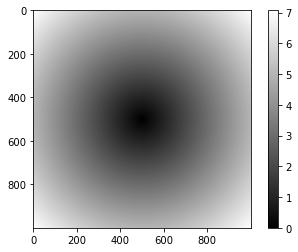

In [187]:
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()

### Expressing Conditional Logic as Array Operations

In [188]:
xarr=np.array([1.1,1.2,1.3,1.4,1.5])

In [189]:
yarr=np.array([2.1,2.2,2.3,2.4,2.5])

In [190]:
cond=np.array([True,False,True,True,False])

**Use** np.where

In [191]:
np.where(cond,xarr,yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

**Replace all positive value with 2 and all negative value with -2**

In [192]:
arr=np.random.randn(4,4)

In [193]:
cond=arr>0

In [194]:
np.where(cond,2,-2)

array([[-2, -2, -2,  2],
       [ 2,  2, -2, -2],
       [ 2,  2,  2, -2],
       [-2,  2,  2,  2]])

**Combine scalars and arrays: replace all positive values in** arr **constant 2**

In [195]:
np.where(cond,2,arr)

array([[-0.07735888, -0.80134169, -0.14182896,  2.        ],
       [ 2.        ,  2.        , -1.28253617, -0.06239607],
       [ 2.        ,  2.        ,  2.        , -1.75477315],
       [-0.51868273,  2.        ,  2.        ,  2.        ]])

### Mathematical and Statistical Methods

**Aggregations(reductions) like** sum,mean **and,** std **:can be called by array instance method or using the top-level NumPy function**

In [196]:
arr=np.random.randn(5,4)

In [197]:
arr

array([[ 0.75626208, -0.41806364,  0.77225486,  0.91843535],
       [-0.02648337, -0.44459356,  0.32111149, -0.52202456],
       [-0.10748278, -0.99137169, -0.66811897, -0.75633232],
       [-0.46229395,  0.86887586,  0.66395896,  1.72996086],
       [-2.1263843 , -1.46282232,  1.24673815, -0.47736858]])

In [198]:
arr.mean()

-0.05928712112797256

In [199]:
np.mean(arr)

-0.05928712112797256

In [200]:
arr.sum()

-1.1857424225594513

**Functions like** mean **and** sum **take an optional argument that computes the statistic over the given axis, resulting in an array with one fewer dimension**

In [201]:
arr.mean(axis=1)#compute across columns

array([ 0.50722216, -0.1679975 , -0.63082644,  0.70012543, -0.70495926])

In [203]:
arr.sum(axis=0)#compute across the rows

array([-1.96638232, -2.44797534,  2.33594449,  0.89267075])

cumsum **and** cumprod **produce an array of intermediate results**

In [204]:
arr=np.array([0,1,2,3,4,5,6,7])

In [205]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

**In multidimensional arrays, accumulation functions like** cumsum **return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower dimensional slice**

In [209]:
arr=np.arange(3*3).reshape(3,3)

In [210]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [211]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [213]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### Methods for Boolean Arrays

**Boolean values are coerced to 1(True) and 0(False)**<br>
sum **is often used as a means of counting** True **values in a boolean array**

In [214]:
arr=np.random.randn(100)

In [216]:
(arr>0).sum()#Number of positive values

52

any **tests whether one or more values in an array is True**<br>
all **checks if every value is** True

In [217]:
bools=np.array([False,False,True,False])

In [218]:
bools.any()

True

In [219]:
bools.all()

False

### Sorting 

**Use** sort

In [220]:
arr=np.random.randn(6)

In [221]:
arr

array([ 0.325421  , -0.53815205,  0.7750739 , -0.41993256,  0.3309375 ,
        0.07488842])

In [222]:
arr.sort()

In [223]:
arr

array([-0.53815205, -0.41993256,  0.07488842,  0.325421  ,  0.3309375 ,
        0.7750739 ])

**You can sort each one-dimensional section of values in a multidimensional array in-place along an axis by passing the axis number to** sort

In [224]:
arr=np.random.randn(5,3)

In [225]:
arr

array([[-0.7364916 ,  0.32728938,  0.22578854],
       [-0.32103373, -1.70195604,  0.38786564],
       [ 1.19758156, -0.57963186, -0.85835722],
       [ 0.25945043,  1.43854684,  0.44249955],
       [ 2.02397093,  0.75060741,  0.46935374]])

In [226]:
arr.sort(1)

In [227]:
arr

array([[-0.7364916 ,  0.22578854,  0.32728938],
       [-1.70195604, -0.32103373,  0.38786564],
       [-0.85835722, -0.57963186,  1.19758156],
       [ 0.25945043,  0.44249955,  1.43854684],
       [ 0.46935374,  0.75060741,  2.02397093]])

**Compute the quantiles of an array**

In [228]:
large_arr=np.random.rand(1000)

In [229]:
large_arr.sort()

In [231]:
large_arr[int(len(large_arr)*0.05)]

0.049771051134220534

### Unique and Other Set Logic

np.unique **returns the sorted unique values in an array**

In [232]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])

In [233]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

np.in1d **tests membership of the values in one array in another, returning a** boolean **array**

In [234]:
values=np.array([6,0,0,3,2,5,6])

In [236]:
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True])

## 4.4 File Input and Output with Arrays
* np.save() **and** np.load() **for efficiently saving and loading array on disk**
* **Save multiple arrays in an uncompressed archive using** np.savez **and passing the arrays as keyword arguments**

## 4.5 Linear Algebra
* **multiplyimg two-dimensinal arrays with \* is an element-wise product instead of a matrix product**
* **function \*, both an array method and a function in the** numpy **namespace, for matrix multiplication**

In [237]:
x=np.array([[1.,2.,3.],[4.,5,6.]])

In [238]:
y=np.array([[6.,23.],[-1,7],[8,9]])

In [239]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [240]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [241]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

**A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array**

In [242]:
np.dot(x,np.ones(3))

array([ 6., 15.])

**The @ sybmbol also works for matrix multiplication**

In [243]:
x @ np.ones(3)

array([ 6., 15.])

## 4.6 Pseudorandom Number Generation

numpy.random **is used for generating whole arrays of sample values from many kinds of probability distributions**

In [245]:
samples=np.random.normal(size=(4,4))

In [246]:
samples

array([[-1.03857537,  0.31828025, -1.30799145,  1.33995405],
       [-2.25643496, -0.99576463, -1.65951137,  1.32802336],
       [-1.12197289,  0.0195745 , -0.82514698, -0.34956775],
       [ 0.13714739, -0.01575841,  0.42791394,  1.76162322]])

## 4.7 Example: Random Walks

**Consider a simple random walk starting at 0 with steps of 1 and -1 occuring with equal probability**

In [249]:
import random
position=0
walk=[position]
steps=1000
for i in range(steps):
    step=1 if random.randint(0,1) else -1
    position+=step
    walk.append(position)

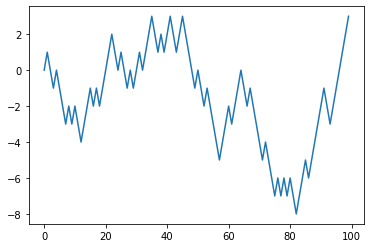

In [250]:
plt.plot(walk[:100])

**Using NumPy to generate random walks**

In [257]:
nsteps=1000
draw=np.random.randint(0,2,size=nsteps)
steps=np.where(draw>0,1,-1)
walk=np.cumsum(steps)

In [258]:
walk.min()

-4

In [259]:
walk.max()

53

**Calculate the first crossing time**

In [260]:
(np.abs(walk)>=10).argmax()#argmax returns the first index of the maximum value in the boolean arrays(True is 1)

77

**Simiulating Many Random Walks at Once**

In [268]:
nwalks=5000
nsteps=1000
draws=np.random.randint(0,2,size=(nwalks,nsteps))
steps=np.where(draws>0,1,-1)
walks=steps.cumsum(1)

In [269]:
walks

array([[ -1,   0,   1, ...,  24,  25,  26],
       [ -1,  -2,  -3, ..., -16, -15, -14],
       [ -1,  -2,  -1, ...,  32,  33,  34],
       ...,
       [  1,   2,   1, ..., -44, -45, -44],
       [ -1,   0,   1, ...,  58,  57,  58],
       [  1,   0,  -1, ...,   8,   9,  10]])

**Compute the minimum crossing time for 30 or -30**

In [270]:
hits30=(np.abs(walks)>=30).any(1)

In [271]:
hits30

array([ True,  True,  True, ...,  True,  True, False])

In [272]:
hits30.sum()

3428

In [273]:
crossing_times=(np.abs(walks[hits30])>=30).argmax(1)

In [274]:
crossing_times

array([759, 715, 849, ..., 917, 881, 721])

In [275]:
crossing_times.mean()

498.72812135355895